In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
path = 'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1h/'

df2 = pd.read_csv(path+'BTCUSDT')[['Tiempo','Close']]
df2.columns = ['Tiempo','Precio']

In [4]:
def MACD(df):
    df['EMA12'] = df.Precio.ewm(span=12).mean()
    df['EMA26'] = df.Precio.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['Signal'] = df.MACD.ewm(span=9).mean()
    print('Indicadores agregados')

In [4]:
# CÓDIGO DE LA SEÑAL DEL MACD:

def señal_MACD(df):
    buy, sell = [],[]
    for i in range(7,len(df)):
        if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1]:
            buy.append(i)
        elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1]:
            sell.append(i)
    return buy, sell

In [80]:
def señal_MACD_wzero(df):
    buy, sell = [],[]
    for i in range(7,len(df)):
        if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1] and df.MACD.iloc[i] < 0 and df.Signal.iloc[i] < 0:
            buy.append(i)
        elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1] and df.MACD.iloc[i] > 0 and df.Signal.iloc[i] > 0:
            sell.append(i)
    return buy, sell

In [5]:
MACD(df2)

Indicadores agregados


In [22]:
df2['Tiempo'] = pd.to_datetime(df2['Tiempo'])

In [23]:
df3 = pd.DataFrame(columns=['Tiempo','Precio','EMA12','EMA26','MACD','Signal'])

for i in range(len(df2)):
    if df2['Tiempo'][i].year >= 2023 and df2['Tiempo'][i].month == 6:
        df3 = df3.append(df2[i:i+1])
df3

C:\Users\tinma\AppData\Local\Temp\ipykernel_31532\2785700657.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2[i:i+1])
C:\Users\tinma\AppData\Local\Temp\ipykernel_31532\2785700657.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2[i:i+1])
C:\Users\tinma\AppData\Local\Temp\ipykernel_31532\2785700657.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2[i:i+1])
C:\Users\tinma\AppData\Local\Temp\ipykernel_31532\2785700657.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df2[i:i+1])
C:\Users\tinma\AppData\Local\Temp\ipykernel_31532\2785700657.py:5: FutureWar

,Tiempo,Precio,EMA12,EMA26,MACD,Signal
50604,2023-06-01 00:00:00,27065.77,27112.538373,27217.967153,-105.428780,-139.047773
50605,2023-06-01 01:00:00,27078.56,27107.310931,27207.640697,-100.329766,-131.304172
50606,2023-06-01 02:00:00,26719.26,27047.610788,27171.464349,-123.853561,-129.814050
50607,2023-06-01 03:00:00,26779.94,27006.430666,27142.462545,-136.031879,-131.057616
50608,2023-06-01 04:00:00,26804.15,26975.310564,27117.402357,-142.091793,-133.264451
...,...,...,...,...,...,...
50906,2023-06-13 14:00:00,25985.67,26064.442501,26015.729142,48.713360,57.644125
50907,2023-06-13 15:00:00,25759.54,26017.534424,25996.752168,20.782256,50.271752
50908,2023-06-13 16:00:00,25865.29,25994.112205,25987.014230,7.097975,41.636996
50909,2023-06-13 17:00:00,25821.88,25967.614943,25974.782065,-7.167122,31.876173


In [24]:
df3 = df3.set_index('Tiempo')
df3

,Precio,EMA12,EMA26,MACD,Signal
Tiempo,,,,,
2023-06-01 00:00:00,27065.77,27112.538373,27217.967153,-105.428780,-139.047773
2023-06-01 01:00:00,27078.56,27107.310931,27207.640697,-100.329766,-131.304172
2023-06-01 02:00:00,26719.26,27047.610788,27171.464349,-123.853561,-129.814050
2023-06-01 03:00:00,26779.94,27006.430666,27142.462545,-136.031879,-131.057616
2023-06-01 04:00:00,26804.15,26975.310564,27117.402357,-142.091793,-133.264451
...,...,...,...,...,...
2023-06-13 14:00:00,25985.67,26064.442501,26015.729142,48.713360,57.644125
2023-06-13 15:00:00,25759.54,26017.534424,25996.752168,20.782256,50.271752
2023-06-13 16:00:00,25865.29,25994.112205,25987.014230,7.097975,41.636996


In [26]:
df2.set_index('Tiempo')

,Precio,EMA12,EMA26,MACD,Signal
Tiempo,,,,,
2017-08-17 04:00:00,4308.83,4308.830000,4308.830000,0.000000,0.000000
2017-08-17 05:00:00,4315.32,4312.345417,4312.199808,0.145609,0.080894
2017-08-17 06:00:00,4324.35,4317.030808,4316.565254,0.465554,0.238542
2017-08-17 07:00:00,4349.99,4327.434737,4325.909352,1.525385,0.674464
2017-08-17 08:00:00,4360.69,4336.470073,4333.975128,2.494945,1.216016
...,...,...,...,...,...
2023-06-13 14:00:00,25985.67,26064.442501,26015.729142,48.713360,57.644125
2023-06-13 15:00:00,25759.54,26017.534424,25996.752168,20.782256,50.271752
2023-06-13 16:00:00,25865.29,25994.112205,25987.014230,7.097975,41.636996


In [19]:
def ganancias(df):
    buy, sell = señal_MACD(df)
    buyprices = df.Precio.iloc[buy]
    sellprices = df.Precio.iloc[sell]
    if sellprices.index[0] < buyprices.index[0]:
        sellprices = sellprices.drop(sellprices.index[0])
    elif buyprices.index[-1] > sellprices.index[-1]:
        buyprices = buyprices.drop(buyprices.index[-1])
    ganancias = []
    for i in range(len(buyprices)):
        ganancias.append((sellprices[i:i+1].item() - buyprices[i:i+1].item()))
    ganancias = pd.DataFrame(ganancias,columns=['ganancia'])
    print(sum(ganancias['ganancia'])*.1)

In [28]:
ganancias(df3)

50.16900000000024


In [ ]:
print('Las ganancias para esta estrategia con periodo de 1 día son:', sum(ganancias['ganancia']),' dólares. Tradeando con un total de 1 BTC. si lo hacemos con un máximo de 100 dólares, apalancados (10 dólares), tendríamos el', 100/30200, 'porciento de las ganancias, lo que sería un total de:', sum(ganancias['ganancia'])*(1000/30200), 'dólares')

In [58]:
g = 0
p = 0
for i in range(len(ganancias)):
    if ganancias['ganancia'][i] > 0:
        g += 1
    elif ganancias['ganancia'][i] < 0:
        p +=1
print(f'Número de trades ganados: {g}. Número de trades perdidos: {p}. Número total de trades: {len(ganancias)}. Número de trades perdidos y ganados: {p+g}')

Número de trades ganados: 80. Número de trades perdidos: 55. Número total de trades: 135. Número de trades perdidos y ganados: 135


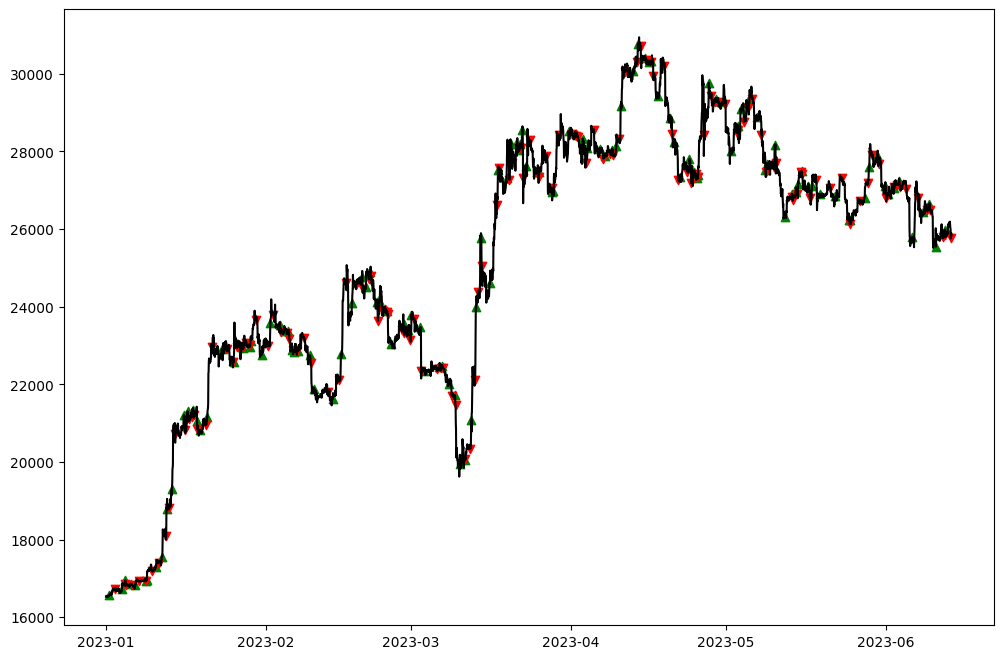

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(df3.iloc[realbuy].index,df3.iloc[realbuy].Precio, marker="^", color='green')
plt.scatter(df3.iloc[realsell].index,df3.iloc[realsell].Precio, marker="v", color='red')
plt.plot(df3.Precio,color='k')
plt.show()

In [19]:
path = 'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/streaming/'

df = pd.read_csv(path+'BTCUSDT')[['Precio','Tiempo']]

In [20]:
MACD(df)
df.head(10)

Indicadores agregados


,Precio,Tiempo,EMA12,EMA26,MACD,Signal
0,25920.01,2023-06-14 09:12:03.975,25920.010000,25920.010000,0.000000,0.000000
1,25920.01,2023-06-14 09:12:05.109,25920.010000,25920.010000,0.000000,0.000000
2,25920.01,2023-06-14 09:12:06.210,25920.010000,25920.010000,0.000000,0.000000
3,25920.01,2023-06-14 09:12:06.929,25920.010000,25920.010000,0.000000,0.000000
4,25920.01,2023-06-14 09:12:07.559,25920.010000,25920.010000,0.000000,0.000000
5,25920.01,2023-06-14 09:12:08.833,25920.010000,25920.010000,0.000000,0.000000
6,25920.00,2023-06-14 09:12:10.092,25920.007769,25920.008222,-0.000453,-0.000115
7,25920.01,2023-06-14 09:12:11.218,25920.008234,25920.008508,-0.000274,-0.000153
8,25920.00,2023-06-14 09:12:12.239,25920.006605,25920.007247,-0.000642,-0.000266
9,25920.01,2023-06-14 09:12:13.130,25920.007249,25920.007627,-0.000378,-0.000291


In [21]:
# CÓDIGO DE LA SEÑAL DEL MACD:

buy, sell = [],[]

for i in range(7,len(df)):
    if df.MACD.iloc[i] > df.Signal.iloc[i] and df.MACD.iloc[i-1] < df.Signal.iloc[i-1]:
        buy.append(i)
    elif df.MACD.iloc[i] < df.Signal.iloc[i] and df.MACD.iloc[i-1] > df.Signal.iloc[i-1]:
        sell.append(i)

In [22]:
realbuy = [i+1 for i in buy]
realsell = [i+1 for i in sell]
buyprices = df.Precio.iloc[realbuy]
sellprices = df.Precio.iloc[realsell]

In [23]:
sellprices

12        25920.01
21        25920.00
34        25920.01
36        25920.01
39        25920.00
            ...   
999230    30306.00
999282    30325.99
999357    30320.87
999437    30316.67
999470    30328.70
Name: Precio, Length: 27158, dtype: float64

In [24]:
buyprices

11        25920.00
13        25920.01
30        25920.01
35        25920.00
37        25920.01
            ...   
999250    30300.16
999329    30321.48
999372    30313.03
999458    30325.18
999491    30339.99
Name: Precio, Length: 27159, dtype: float64

In [25]:
buyprices = buyprices.drop(buyprices.index[-1])

In [26]:
buyprices

11        25920.00
13        25920.01
30        25920.01
35        25920.00
37        25920.01
            ...   
999206    30307.11
999250    30300.16
999329    30321.48
999372    30313.03
999458    30325.18
Name: Precio, Length: 27158, dtype: float64

In [60]:
sellprices[0:1].item()

C:\Users\tinma\AppData\Local\Temp\ipykernel_17736\2548786800.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sellprices[0:1].item()


25920.01

In [27]:
ganancias = []
for i in range(len(buyprices)):
    ganancias.append((sellprices[i:i+1].item() - buyprices[i:i+1].item()))

C:\Users\tinma\AppData\Local\Temp\ipykernel_17900\478113809.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ganancias.append((sellprices[i:i+1].item() - buyprices[i:i+1].item()))


In [28]:
ganancias = pd.DataFrame(ganancias,columns=['ganancia'])
ganancias

,ganancia
0,0.01
1,-0.01
2,0.00
3,0.01
4,-0.01
...,...
27153,-1.11
27154,25.83
27155,-0.61
27156,3.64


In [29]:
mayores_ganancias = ganancias.nlargest(10,'ganancia')
mayores_perdidas = ganancias.nsmallest(10,'ganancia')
mayores_ganancias

,ganancia
6030,367.76
20250,238.46
14395,210.00
14379,201.61
15920,167.30
13620,162.47
20163,142.02
20321,133.34
1141,130.83
20179,107.80


In [30]:
mayores_perdidas

,ganancia
1105,-96.30
18074,-94.71
15975,-72.47
4702,-71.08
1138,-67.03
1139,-65.38
20691,-63.91
18073,-63.89
26440,-63.63
14380,-58.40


In [31]:
g = 0
p = 0
for i in range(len(ganancias)):
    if ganancias['ganancia'][i] > 0:
        g += 1
    elif ganancias['ganancia'][i] < 0:
        p +=1
print(f'Número de trades ganados: {g}. Número de trades perdidos: {p}. Número total de trades: {len(ganancias)}. Número de trades perdidos y ganados: {p+g}')

Número de trades ganados: 11778. Número de trades perdidos: 12121. Número total de trades: 27158. Número de trades perdidos y ganados: 23899


In [32]:
sum(ganancias['ganancia'])

27219.409999997926

In [69]:
buyprices.index[0]

11

In [70]:

j = 0
lista = []
for i in range(len(buyprices)):
    x = sellprices.index[i]
    y = buyprices.index[i]
    if y < x:
        j += 1
    elif y > x:
        lista.append(i)
j

27158